> #### `Backpropogation in Regression`

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action="ignore")

# Dummy Dataset
df = pd.DataFrame([[8, 8, 10, 4], [7, 9, 7, 5], [6, 10, 5, 6], [5, 12, 3, 7]], columns = ['cgpa', 'resume_score', 'sgpa', 'package'])
df

,cgpa,resume_score,sgpa,package
0,8,8,10,4
1,7,9,7,5
2,6,10,5,6
3,5,12,3,7


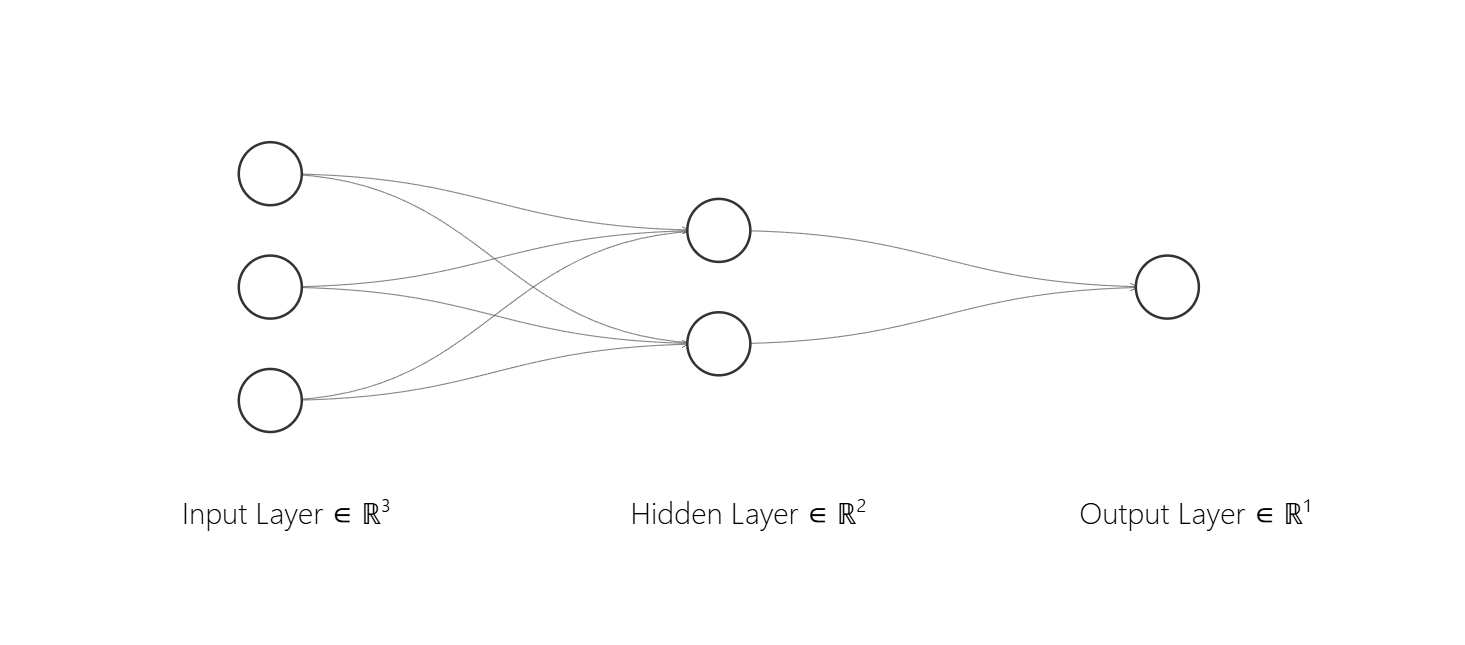

In [2]:
# Parameter Initialization
def parameter_initializaton(ann_dim):
    # ann_dim is the ann architecture - [3,2,1]
    '''
    parameters = {
        w1 = [[w11, w12], [w21, w22]], [[w31, w32]], -> Layer 1
        w2 = [[w11], [w21]]                          -> Layer 2
        b1 = [[b1], [b2]]                            -> Layer 1
        b2 = [[b1]]                                  -> Layer 2
    }
    '''
    parameters = {}
    length = len(ann_dim)

    for i in range(1, length):
        parameters['w' + str(i)] = np.ones((ann_dim[i-1], ann_dim[i])) * 0.1
        parameters['b' + str(i)] = np.zeros((ann_dim[i], 1))

    return parameters

# Assigned parameters
parameters = parameter_initializaton([3,2,1])
parameters

{'w1': array([[0.1, 0.1],
        [0.1, 0.1],
        [0.1, 0.1]]),
 'b1': array([[0.],
        [0.]]),
 'w2': array([[0.1],
        [0.1]]),
 'b2': array([[0.]])}

In [3]:
# Forward Propogation
def forward_propagation(X, parameters):
    layers = len(parameters) // 2 # no. of layers

    A = X # Shape (1, n)
    # We have to calculate the y_hat layer by layer
    for i in range(1, layers + 1):
        # Fetching previous Result
        A_prev = A

        # Fetching the parameters of current layers
        w = parameters['w' + str(i)]
        b = parameters['b' + str(i)]

        # Dot product
        A = np.dot(A_prev, w) + b.T

    return A, A_prev.reshape(-1, 1)

# Applying forward propogation
A, A1 = forward_propagation(df.iloc[[0], :-1], parameters)
print(A, A1, sep="\n")

[[0.52]]
[[2.6]
 [2.6]]


In [4]:
# Updating parameters
def update_parameters(y, y_hat, A1, X, parameters):
    # For 2nd layer
    lr2 = 0.001 * 2 * (y - y_hat)
    for i in range(len(parameters['w2'])):
        parameters['w2'][i][0] += lr2 * A1[i][0]
    parameters['b2'][0][0] += lr2

    # For 1st layer
    lr1 = 0.01 * 2 * (y - y_hat)
    for j in range(len(parameters['w1'][0])): # Number of output neurons
        for k in range(len(parameters['w1'])): # Number of input neurons
            parameters['w1'][k][j] += lr1 * parameters['w2'][j][0] * X[0][k]
        parameters['b1'][j][0] += lr1 * parameters['w2'][j][0]

update_parameters(df['package'][0], A, A1, np.array(df.iloc[:1, :-1]), parameters)
parameters

{'w1': array([[0.16575585, 0.16575585],
        [0.16575585, 0.16575585],
        [0.18219482, 0.18219482]]),
 'b1': array([[0.00821948],
        [0.00821948]]),
 'w2': array([[0.118096],
        [0.118096]]),
 'b2': array([[0.00696]])}

In [5]:
# Looping on the complete dataset for 10 epochs

# Initilizing parameters
parameters = parameter_initializaton([3,2,1])

for i in range(10): # Running for 10 epochs
    loss = []
    for j in range(df.shape[0]): # Running over all the rows
        # Forward Propogation
        y_hat, A1 = forward_propagation(df.iloc[[j], :-1], parameters)

        # Loss Calculation
        curr_loss = (df['package'][j] - y_hat)**2
        loss.append(curr_loss)

        # Updating w and b
        update_parameters(df['package'][j], y_hat, A1, np.array(df.iloc[j:j+1,:-1]), parameters)

    print(f"Epoch {i}: Loss = {np.array(loss).mean()}")

Epoch 0: Loss = 15.22626845551554
Epoch 1: Loss = 3.3895853279191424
Epoch 2: Loss = 4.652323394025205
Epoch 3: Loss = 3.9687619019485134
Epoch 4: Loss = 3.4870442376065687
Epoch 5: Loss = 3.1242206677382836
Epoch 6: Loss = 2.8404791504932425
Epoch 7: Loss = 2.6135256699827116
Epoch 8: Loss = 2.4296288262166392
Epoch 9: Loss = 2.279807970853335


In [6]:
parameters # Updated parameters after 10 epochs

{'w1': array([[0.51853292, 0.51853292],
        [1.19997673, 1.19997673],
        [0.22146824, 0.22146824]]),
 'b1': array([[0.09202999],
        [0.09202999]]),
 'w2': array([[0.20031287],
        [0.20031287]]),
 'b2': array([[0.03335676]])}

---

> #### `Backpropogation in binary classification`

In [7]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings(action="ignore")

# Dummy Dataset
df = pd.DataFrame(
    [[1, 2, 3, 1], [4, 5, 6, 0], [7, 8, 9, 1], [10, 11, 12, 0]],
    columns=["cgpa", "iq", "12th marks", "placed"]
)
df

,cgpa,iq,12th marks,placed
0,1,2,3,1
1,4,5,6,0
2,7,8,9,1
3,10,11,12,0


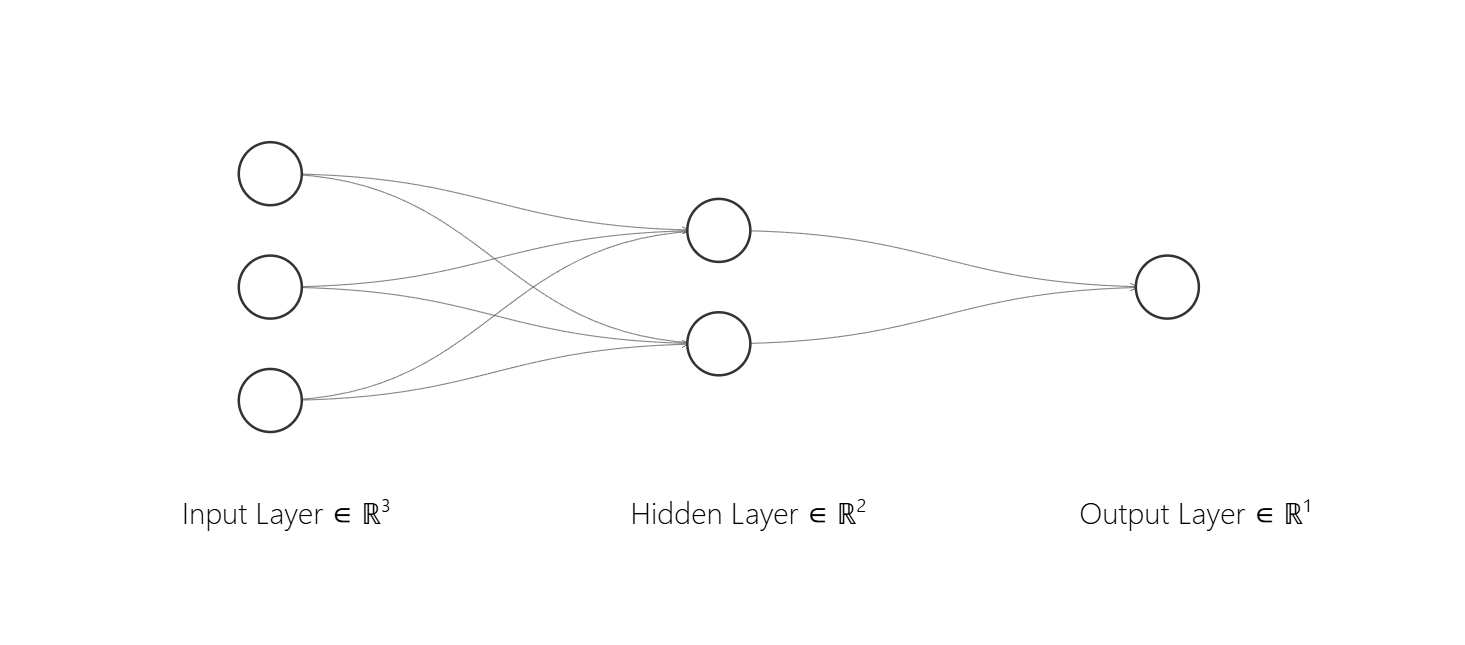

In [8]:
# Weight initialization
def initialize_weights(shape):
    parameters = dict()

    for i in range(1, len(shape)):
        parameters[f"w{i}"] = np.random.randn(shape[i-1], shape[i])
        parameters[f"b{i}"] = np.zeros((shape[i], 1))

    return parameters

parameters = initialize_weights(shape=[3, 2, 1])
parameters

{'w1': array([[ 0.1196128 ,  0.4924854 ],
        [-1.09938703, -0.33572463],
        [ 0.43829096,  0.23120445]]),
 'b1': array([[0.],
        [0.]]),
 'w2': array([[-0.53930788],
        [-0.21254979]]),
 'b2': array([[0.]])}

In [9]:
# Forward propogation
def forward_propogation(parameters, shape, X):
    # Assigning input to X
    A = X

    for i in range(1, len(shape)):

        # Storing previous output for further use
        A_prev = A

        # Fetching the weights
        w, b = parameters[f"w{i}"], parameters[f"b{i}"]

        # Dot Product
        A = np.dot(A_prev, w) + b.reshape(1, -1)

        if i == len(shape) - 1:
            # Sigmoid activation for output
            A = 1 / (1 + np.exp(-A))

    # Returning the output of all the layers in required shape
    return A.reshape(-1, 1), A_prev.reshape(-1, 1)

A, A_prev = forward_propogation(parameters, shape=[3, 2, 1], X=df.iloc[[0], :-1])

In [10]:
# Updating weights
def update_parameters(parameters, shape, A, A_prev, X, y):
    # learning_rate
    lr = 0.1

    # For 2nd layer
    for i in range(0, shape[1]):
        parameters["w2"][i][0] -= lr * (y - A[0]) * A_prev[i][0]
    parameters["b2"][0][0] -= lr * (y - A[0])

    # For 1st layer
    for i in range(0, shape[0]): # 3 times
        for j in range(0, shape[1]): # 2 times
            parameters["w1"][i][j] -= lr * (y - A[0]) * parameters["w2"][j][0] * X[0][i]
        parameters["b1"][j][0] -= lr * (y - A[0]) * parameters["w2"][j][0] 

update_parameters(parameters, [3, 2, 1], A, A_prev, df.iloc[[0], :-1].to_numpy(), df.iloc[[0], -1].to_numpy())

In [11]:
# Updated parameters
parameters

{'w1': array([[ 0.1411469 ,  0.50244511],
        [-1.05631885, -0.31580521],
        [ 0.50289324,  0.26108358]]),
 'b1': array([[0.        ],
        [0.02987914]]),
 'w2': array([[-0.50683529],
        [-0.23441588]]),
 'b2': array([[-0.04248736]])}

In [12]:
# Backpropogation
from math import log1p
for i in range(epochs := 10):
    # Storing the average loss at each epoch
    loss = []

    for j in range(df.shape[0]):

        # Forwaed Propogation
        A, A_prev = forward_propogation(parameters, shape=[3, 2, 1], X=df.iloc[[j], :-1])

        # Calculating loss
        loss.append(- (df["placed"][j] - log1p(A[0][0])) - ((1 - df["placed"][j]) * log1p(1 - A[0][0])))

        # Updating weights
        update_parameters(parameters, [3, 2, 1], A, A_prev, df.iloc[[j], :-1].to_numpy(), df.iloc[[j], -1].to_numpy())

    # Printing loss
    print(f"Epoch {i} Loss : {np.mean(loss)}")

Epoch 0 Loss : -0.1987672597200376
Epoch 1 Loss : 0.18964210538746865
Epoch 2 Loss : 0.1931471805599453
Epoch 3 Loss : 0.1931471805599453
Epoch 4 Loss : 0.1931471805599453
Epoch 5 Loss : 0.1931471805599453
Epoch 6 Loss : 0.1931471805599453
Epoch 7 Loss : 0.1931471805599453
Epoch 8 Loss : 0.1931471805599453
Epoch 9 Loss : 0.1931471805599453
